<a href="https://colab.research.google.com/github/taberdar/colab/blob/main/ESP_task_4a_student.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pandas and matplotlib prompt sheet for ESP

## Run this first 

then the others in order 

or run the whole lot

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import os.path
if not os.path.isfile('sampledata/ESP/Shoes.csv') :
  !rm -rf sampledata
  !git clone https://github.com/awchisholm/sampledata.git

## Read the csv file /content/sampledata/ESP/Shoes.csv into a pandas data frame - make sure you read the date column in 

Google for the parameter `parse_dates` to the function `pd.read_csv`


In [ ]:
shoes = pd.read_csv('/content/sampledata/ESP/Shoes.csv', parse_dates=['Date']) # # create data frame called shoes from a csv file
shoes.head()

,Name,Show,Unit price GBP,Quantity bought,Discount percent,Date
0,Ash,Adidas continental 80,80.0,1,1,2020-01-10
1,Joe,Adidas Falcon,43.0,1,10,2020-06-10
2,Tom,Adidas Originals ZX 750,80.0,1,0,2020-11-10
3,Jack,Adidas Originals ZX Flux,80.0,1,10,2020-10-16
4,Will,Adidas Yeezy Boost 350 V2 Cloud White (Non-Ref...,300.0,1,0,2020-10-21


## Create a new data frame column called `Price offered`.

Do this by multiplying the `Unit price GBP` column by the `Quantity bought` column.

In [ ]:
shoes['Price offered'] = shoes['Unit price GBP'] * shoes['Quantity bought']  # calculate the price offered by multiplying unit price by quantity bought and make a new data frame column
shoes.head()  # print out the first 5 rows  

,Name,Show,Unit price GBP,Quantity bought,Discount percent,Date,Price offered
0,Ash,Adidas continental 80,80.0,1,1,2020-01-10,80.0
1,Joe,Adidas Falcon,43.0,1,10,2020-06-10,43.0
2,Tom,Adidas Originals ZX 750,80.0,1,0,2020-11-10,80.0
3,Jack,Adidas Originals ZX Flux,80.0,1,10,2020-10-16,80.0
4,Will,Adidas Yeezy Boost 350 V2 Cloud White (Non-Ref...,300.0,1,0,2020-10-21,300.0


## Create a new data frame column called `Price paid`

Do this by multiplying the `Price offered` column by the `Discount percent` column and multiplying by 100 to get the discount. Then subtract this from `Price offered` to get the final `Price paid`.

You can do it in one line but if you prefer you can do it in multiple lines.

(percent means out of 100: per --> out of:  cent --> 100)

In [ ]:
shoes['Price paid'] = shoes['Price offered'] - (shoes['Price offered'] * shoes['Discount percent'] / 100)  # Calculate Price paid by working out the discount and subtracting this from the Price offered
shoes.head()

,Name,Show,Unit price GBP,Quantity bought,Discount percent,Date,Price offered,Price paid
0,Ash,Adidas continental 80,80.0,1,1,2020-01-10,80.0,79.2
1,Joe,Adidas Falcon,43.0,1,10,2020-06-10,43.0,38.7
2,Tom,Adidas Originals ZX 750,80.0,1,0,2020-11-10,80.0,80.0
3,Jack,Adidas Originals ZX Flux,80.0,1,10,2020-10-16,80.0,72.0
4,Will,Adidas Yeezy Boost 350 V2 Cloud White (Non-Ref...,300.0,1,0,2020-10-21,300.0,300.0


## Convert dates to be Python date time objects.

We are going to use the two variables below as dates to query the data but they are strings and need to be converted to date time objects. 

Google `pandas to_datetime`. Make sure you also choose the `dayfirst` parameter.

In [ ]:
startdate_string = '01/01/2020'
enddate_string = '31/12/2020'
startdate = pd.to_datetime(startdate_string, dayfirst=True) # convert date strings to be Pandas datetime object (dayfirst means dd/mm/yyyy - European date format)
enddate = pd.to_datetime(enddate_string, dayfirst=True)     # this is needed to make sure comparisons work later on
enddate

Timestamp('2020-12-31 00:00:00')

## Choose a name to search for

This is just a string - no need to do anything to it.

In [ ]:
name = 'Jack'   # this is just a parameter we will use later

## Search in the data frame for data between two dates and for the named person

This can be done in one line of code but you can do it in more if it makes it easier.

Hints: 

*   Google for `pandas loc`
*   Use `<=` and `>=` and `==` for less than or equal, greater than or equal and equals
*   Use `&` to logically AND things together
*   Google `pandas .copy()` - this copies the answer to a new variable



In [ ]:
tf = (shoes['Date'] >= startdate) & (shoes['Date'] <= enddate) & (shoes['Name'] == name)  # this is an array of True/False
oneyear_shoes = shoes.loc[tf].copy()   # we use the true/false flags with the .loc function to select the rows we want. 
# This is a new data frame 
oneyear_shoes

,Name,Show,Unit price GBP,Quantity bought,Discount percent,Date,Price offered,Price paid
3,Jack,Adidas Originals ZX Flux,80.0,1,10,2020-10-16,80.0,72.0
14,Jack,EMPORIO ARMANI Shoes,155.0,1,0,2020-10-12,155.0,155.0


## Find the total price paid for the named person between the dates

Use `sum()` to add entire columns.

In [ ]:
total = oneyear_shoes['Price paid'].sum()  # sum the Price paid in the new data frame we made above
total

227.0

## Sort the data by `Date`

Google `pandas sort_values`. Also use the `inplace` parameter.

In [ ]:
oneyear_shoes.sort_values(by='Date', inplace=True)  # This sorts in the original dataframe (inplace = True)
oneyear_shoes

,Name,Show,Unit price GBP,Quantity bought,Discount percent,Date,Price offered,Price paid
14,Jack,EMPORIO ARMANI Shoes,155.0,1,0,2020-10-12,155.0,155.0
3,Jack,Adidas Originals ZX Flux,80.0,1,10,2020-10-16,80.0,72.0


## Plot the price paid by date

Hints

*   Try `plt.scatter`
*   Try `plt.bar`
*   `plt.xticks` with a rotation changes the angle of the axes
*   `plt.title` makes a title
*   `plt.show` shows the plot







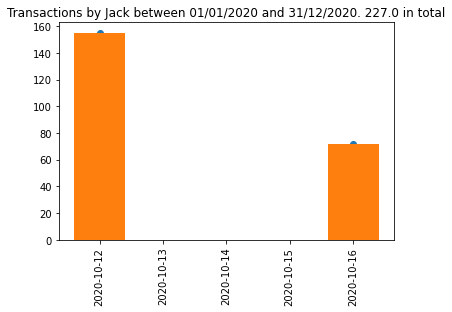

In [ ]:
plt.scatter(oneyear_shoes['Date'], oneyear_shoes['Price paid'])  # A scatter plot of price paid by date - the first parameter is the X axis, the second is the Y axis
plt.bar(oneyear_shoes['Date'], oneyear_shoes['Price paid'])      # we add a bar plot to the same graph
plt.xticks(rotation=90)  # Rotate the axis
plt.title('Transactions by ' + name + ' between ' + startdate_string + ' and ' + enddate_string + '. ' + str(total) + ' in total')  # A nice title
plt.show()  # to show the graph

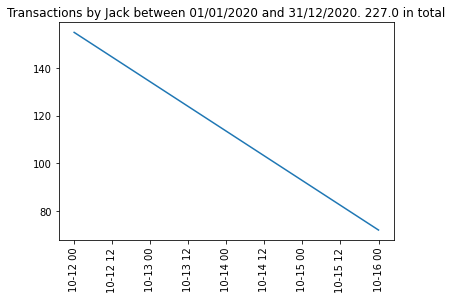

In [ ]:
plt.plot(oneyear_shoes['Date'], oneyear_shoes['Price paid'])      # we add a line plot
plt.xticks(rotation=90)  # Rotate the axis
plt.title('Transactions by ' + name + ' between ' + startdate_string + ' and ' + enddate_string + '. ' + str(total) + ' in total')  # A nice title
plt.show()  # to show the graph

## Plot all names for all time using different colours (advanced)

Hints

*   Google `plt.subplots`
*   Google `pandas groupby` to group data for different names together
*   Google iterating over a group to work out how to plot each group one by one





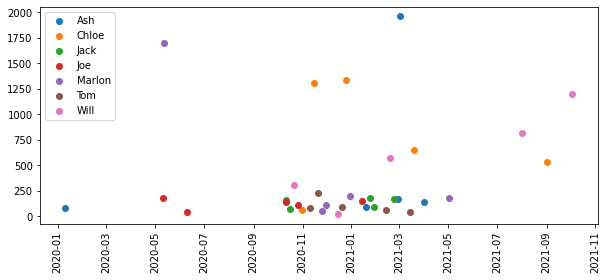

In [ ]:
fig, ax = plt.subplots(figsize=(10,4)) # more complicated - this sets the size 
for key, grp in shoes.groupby(['Name']):  # this for loop prints a graph for each name in the shoes data frame - it will go round as many times as there are unique names
    ax.scatter(grp['Date'], grp['Price paid'], label=key)  # the graph is date and price paid

ax.legend()  # add a legend
plt.xticks(rotation=90) # Rotate axis
plt.show() # show the plot